In [3]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package

library(MASS)  #  load the MASS package

In [4]:
data(Boston)
head(Boston)
nrow(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506

In [5]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
    
if (not.installed("DAAG")) install.packages("DAAG", repos="http://cran.us.r-project.org")

library(DAAG)

Loading required package: lattice

Attaching package: ‘DAAG’

The following object is masked from ‘package:MASS’:

    hills



In [6]:
# simple linear regression
fit = lm(medv ~ ., data=Boston)
# plot(fit)

In [7]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
    
if (not.installed("caret")) install.packages("caret", repos="http://cran.us.r-project.org")

library(caret)

Loading required package: ggplot2


### linear regression - caret

In [214]:
lmFit <- train(medv ~ .,
               data = Boston,
               method = "lm",
               trControl = trainControl(method = "cv"))
print(lmFit)
summary(lmFit)

Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 456, 455, 456, 455, 455, 456, ... 
Resampling results

  RMSE      Rsquared   RMSE SD    Rsquared SD
  4.811032  0.7404295  0.9149434  0.06557064 

 



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  

In [9]:
# residuals(lmFit)

In [10]:
# fitted_value = fitted(lmFit)

In [11]:
# actual_value = Boston$medv
# head(Boston)

### linear regression

In [123]:
if (not.installed("hydroGOF")) install.packages("hydroGOF", repos="http://cran.us.r-project.org")
library(hydroGOF)
if (not.installed("ggplot2")) install.packages("ggplot2", repos="http://cran.us.r-project.org")
library(ggplot2)

In [196]:
k.folds <- function(k) {
    folds <- createFolds(Boston$medv, k = k, list = TRUE, returnTrain = TRUE)
    for (i in 1:k) {
        model <- lm(medv ~ ., data=Boston[folds[[i]],])
        testset <- Boston[-folds[[i]],]
        predictions <- predict(object=model, newdata=testset)
        err <- c(err, rmse(predictions,testset$medv))
    }
    err
}

set.seed(100)
err <- c()
err <- k.folds(10)
err

[1] 5.112286 5.162387 5.410737 5.717539 5.516167 4.615891 4.541385 4.146089
 [9] 3.715148 4.480979

In [95]:
mean.rmse <- mean(err)
mean.rmse

[1] 4.841861

### Visualization

In [138]:
set.seed(100)
folds <- createFolds(Boston$medv, k = 10, list = TRUE, returnTrain = TRUE)
model <- lm(medv ~ ., data=Boston[folds[[9]],])
testset <- Boston[-folds[[9]],]
predictions <- predict(object=model, newdata=testset)
pred_err <- rmse(predictions,testset$medv)
pred_err

[1] 3.715148

In [187]:
model


Call:
lm(formula = medv ~ ., data = Boston[folds[[9]], ])

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  38.157981    -0.094536     0.051512     0.035302     2.810250   -18.550229  
         rm          age          dis          rad          tax      ptratio  
   3.645707     0.004727    -1.527386     0.315000    -0.012885    -0.970655  
      black        lstat  
   0.009600    -0.542028  


In [188]:
summary(model)


Call:
lm(formula = medv ~ ., data = Boston[folds[[9]], ])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4589  -2.8303  -0.5883   1.7383  25.6058 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.157981   5.542915   6.884 2.01e-11 ***
crim         -0.094536   0.036863  -2.565 0.010661 *  
zn            0.051512   0.014469   3.560 0.000411 ***
indus         0.035302   0.065337   0.540 0.589267    
chas          2.810250   0.925307   3.037 0.002530 ** 
nox         -18.550229   4.130772  -4.491 9.07e-06 ***
rm            3.645707   0.447534   8.146 3.90e-15 ***
age           0.004727   0.014107   0.335 0.737724    
dis          -1.527386   0.213555  -7.152 3.58e-12 ***
rad           0.315000   0.070329   4.479 9.57e-06 ***
tax          -0.012885   0.003970  -3.246 0.001260 ** 
ptratio      -0.970655   0.140577  -6.905 1.76e-11 ***
black         0.009600   0.002878   3.336 0.000923 ***
lstat        -0.542028   0.053953 -10.046  < 2e-16 *

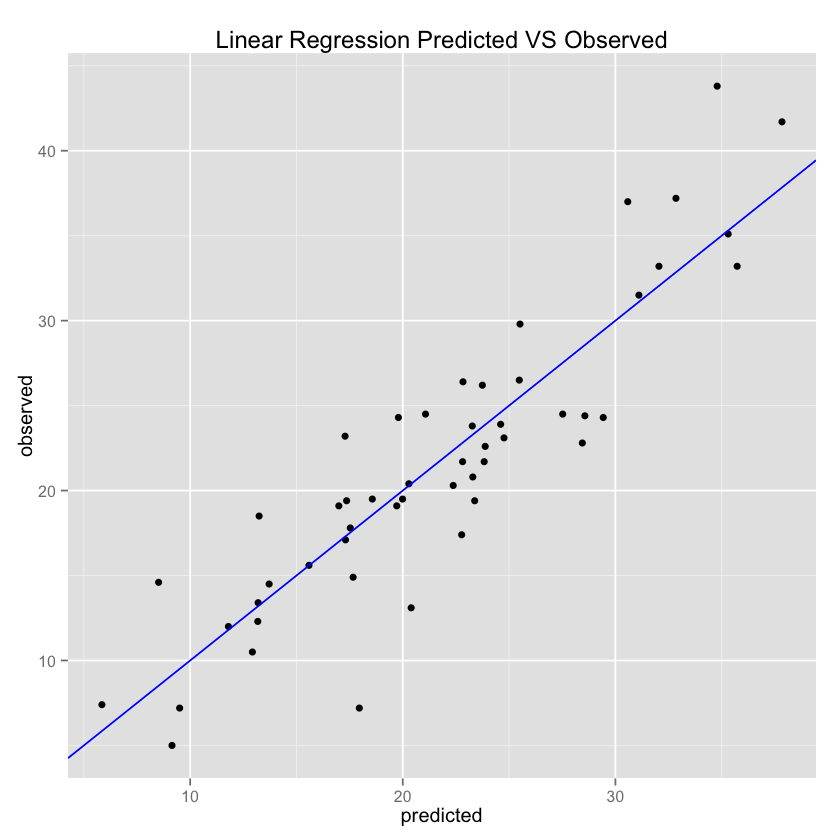

In [147]:
df_lm <- data.frame(predicted = predictions, observed = testset$medv)
ggplot(df_lm, aes(x = predicted, y = observed)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, colour = "blue") +
  ggtitle("Linear Regression Predicted VS Observed")

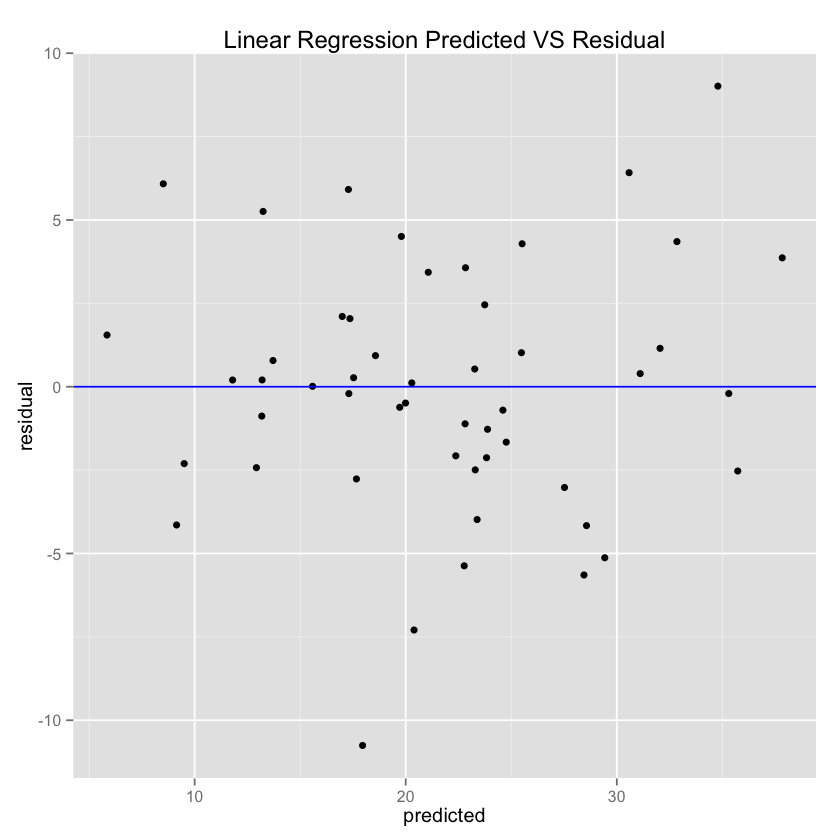

In [142]:
df_lm2 <- data.frame(predicted = predictions, residual = testset$medv - predictions)
ggplot(df_lm2, aes(x = predicted, y = residual)) +
  geom_point() +
  geom_hline(yintercept = 0, colour = "blue") +
  ggtitle("Linear Regression Predicted VS Residual")

## Repeat the step for part 3 - Polynomial Regression 

### Plot RMSE for a fixed training and test set

In [181]:
# Split the data
set.seed(5566)
train_index <- createDataPartition(Boston$medv, p = .8, list = FALSE)
trainset <- Boston[train_index, ]
testset <- Boston[-train_index, ]

In [212]:
nrow(trainset)
nrow(testset)

[1] 407

[1] 99

In [179]:
rmse_value <- c()
for(i in 1:15) {
    poly_model <- lm(medv ~ poly(lstat,i), data = trainset)
    poly_pred <- predict(poly_model, testset)
    err <- postResample(pred = poly_pred, obs = testset$medv)
    rmse_value <- c(rmse_value, err['RMSE'])
}
rmse_value

RMSE     RMSE     RMSE     RMSE     RMSE     RMSE     RMSE     RMSE 
5.747603 5.036123 4.689110 4.492013 4.338300 4.328564 4.326645 4.358158 
    RMSE     RMSE     RMSE     RMSE     RMSE     RMSE     RMSE 
4.312699 4.970973 4.809056 5.660471 6.298408 5.403646 7.545760

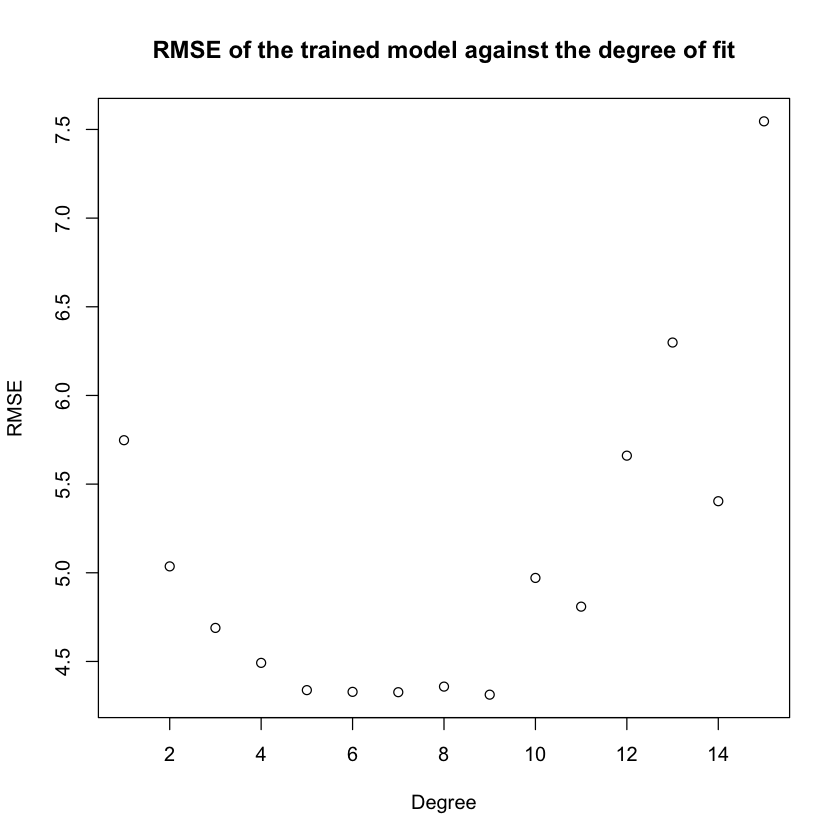

In [180]:
plot(c(1:15),rmse_value, main="RMSE of the trained model against the degree of fit", ylab="RMSE", xlab="Degree")

### Plot RMSE for the average RMSE using cross validation - using caret

In [92]:
rmse_value2 <- c()
for(i in 1:15) {
    polyLmFit <- train(medv ~ poly(lstat,i),
               data = Boston,
               method = "lm",
               trControl = trainControl(method = "cv"))
    rmse_value2 <- c(rmse_value2, polyLmFit$results['RMSE'])
}
# rmse_value2

# polyLmFit <- train(medv ~ poly(lstat,5),
#                data = Boston,
#                method = "lm",
#                trControl = trainControl(method = "cv"))
# polyLmFit$results['RMSE']
# summary(polyLmFit)

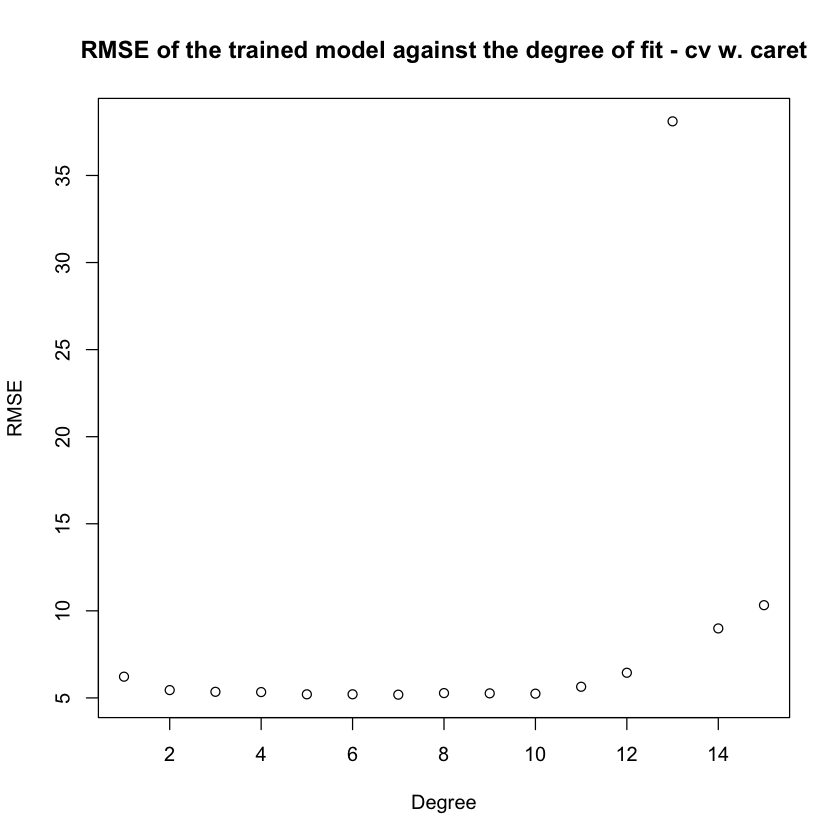

In [89]:
plot(c(1:15),rmse_value2, main="RMSE of the trained model against the degree of fit - cv w. caret", ylab="RMSE", xlab="Degree")

In [182]:
k.folds2 <- function(k,deg) {
    for (i in 1:deg) {
        folds <- createFolds(Boston$medv, k = k, list = TRUE, returnTrain = TRUE)
        for (j in 1:k) {
            model <- lm(medv ~ poly(lstat,i), data=Boston[folds[[j]],])
            predictions <- predict(object=model, newdata=Boston[-folds[[j]],])
            err <- c(err, rmse(predictions,Boston[-folds[[j]],]$medv))
        }
        rmse_value3 <- c(rmse_value3, mean(err))
    }
    rmse_value3
}

set.seed(5566)
rmse_value3 <- c()
rmse_value3 <- k.folds2(10,15)
rmse_value3

[1] 5.797750 5.657652 5.574616 5.496337 5.437292 5.404672 5.422091 5.405928
 [9] 5.386783 5.408744 5.425450 5.491382 5.700235 5.881929 6.954659

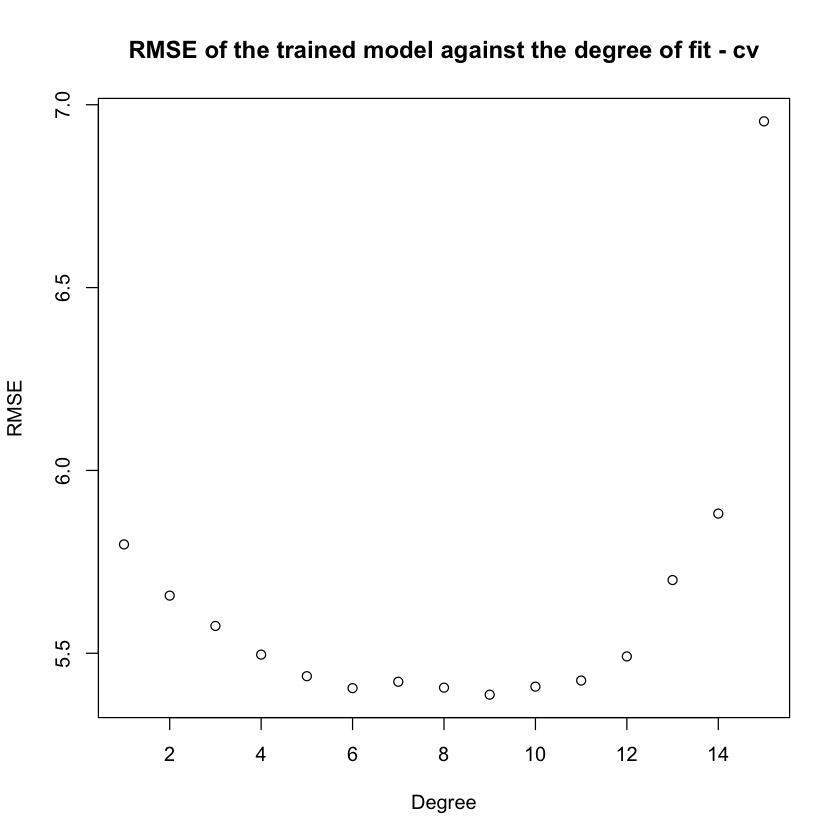

In [209]:
plot(c(1:15),rmse_value3, main="RMSE of the trained model against the degree of fit - cv", ylab="RMSE", xlab="Degree")

# 5) Regularization

### Ridge Regression

In [205]:
### ridge regression - 0.1
ridge_grid <- expand.grid(lambda = seq(0, .1, length = 15))
set.seed(100)
ridge_model <- train(medv ~ .,
                   data = Boston,
                   method = "ridge",
                   preProcess = c("center", "scale"),
                   tuneGrid = ridge_grid,
                   trControl = trainControl(method= "cv"))
ridge_model
# ridge_model$finalModel$coefficients
# ridge_pred <- predict(ridge_model, testset)
# postResample(pred = ridge_pred,  obs = testset$medv)

Ridge Regression 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 455, 456, 456, 455, 455, 455, ... 
Resampling results across tuning parameters:

  lambda       RMSE      Rsquared   RMSE SD    Rsquared SD
  0.000000000  4.841861  0.7299384  0.6451659  0.07053065 
  0.007142857  4.839480  0.7303230  0.6497413  0.07176517 
  0.014285714  4.838999  0.7304902  0.6548439  0.07289572 
  0.021428571  4.839785  0.7305147  0.6602515  0.07393266 
  0.028571429  4.841461  0.7304417  0.6658337  0.07488616 
  0.035714286  4.843792  0.7303001  0.6715114  0.07576543 
  0.042857143  4.846626  0.7301090  0.6772347  0.07657854 
  0.050000000  4.849862  0.7298813  0.6829718  0.07733250 
  0.057142857  4.853431  0.7296261  0.6887017  0.07803337 
  0.064285714  4.857284  0.7293499  0.6944109  0.07868641 
  0.071428571  4.861386  0.7290575  0.7000903  0.07929622 
  0.078571429  4.865713  0.7287524  0.7057341  0.07986680

In [234]:
k.folds <- function(k) {
    folds <- createFolds(Boston$medv, k = k, list = TRUE, returnTrain = TRUE)
    for (i in 1:k) {
        model <- lm.ridge(medv ~ ., data=Boston[folds[[i]],], lambda = c(1, 0.1, 0.01, 0.001))
        testset <- Boston[-folds[[i]],]
        predictions <- predict(object=model, newdata=testset)
        err <- c(err, rmse(predictions,testset$medv))
    }
    err
}

set.seed(100)
err <- c()
err <- k.folds(10)
err

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "ridgelm"


NULL

In [267]:
require(glmnet)

In [293]:
x <- as.matrix(Boston[,-14])
y <- as.double(as.matrix(Boston[, 14]))

# Fitting the model (Ridge: Alpha = 0)
set.seed(999)
cv.ridge <- cv.glmnet(x, y, alpha=0,lambda=c(1, 0.1, 0.01, 0.001), parallel=TRUE, standardize=TRUE, type.measure='auc')

cv.ridge$lambda.min
coef(cv.ridge, s=cv.ridge$lambda.min)
# min.lambda.index <- which(cv.ridge$lambda == cv.ridge$lambda.min)
# min.lambda.index
# cv.ridge$glmnet.fit$beta[, min.lambda.index]
# min.lambda.betas <- predict(cv.ridge, s = "lambda.min")
# min.lambda.betas

Warning message:
In cv.elnet(list(structure(list(a0 = structure(c(26.1701066851414, : Only 'mse', 'deviance' or 'mae'  available for Gaussian models; 'mse' used

[1] 0.01

14 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  36.213567973
crim         -0.107213955
zn            0.046013403
indus         0.017817600
chas          2.697113291
nox         -17.616270961
rm            3.818440456
age           0.000531772
dis          -1.469112829
rad           0.299805252
tax          -0.012035779
ptratio      -0.949863545
black         0.009303323
lstat        -0.523643956

In [255]:
# ridge_grid <- expand.grid(lambda = seq(0, .001, length = 15))
ridge_grid <- expand.grid(lambda = c(1, 0.1, 0.01, 0.001))
set.seed(100)
ridge_model <- train(medv ~ .,
                   data = Boston,
                   method = "ridge",
                   preProcess = c("center", "scale"),
                   tuneGrid = ridge_grid,
                   trControl = trainControl(method= "cv"))
ridge_model
# ["beta.pure"]
# ridge_pred <- predict(ridge_model, testset)
# postResample(pred = ridge_pred,  obs = testset$medv)

Ridge Regression 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 455, 456, 456, 455, 455, 455, ... 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared   RMSE SD    Rsquared SD
  0.001   4.841379  0.7300093  0.6457625  0.07071009 
  0.010   4.839102  0.7304109  0.6517343  0.07222930 
  0.100   4.879879  0.7277846  0.7224212  0.08137637 
  1.000   6.393033  0.6839727  1.1647402  0.09222020 

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was lambda = 0.01. 

In [259]:
summary(ridge_model$finalModel)

            Length Class      Mode     
call          4    -none-     call     
actions      16    -none-     list     
allset       13    -none-     numeric  
beta.pure   208    -none-     numeric  
vn           13    -none-     character
mu            1    -none-     numeric  
normx        13    -none-     numeric  
meanx        13    -none-     numeric  
lambda        1    -none-     numeric  
L1norm       16    -none-     numeric  
penalty      16    -none-     numeric  
df           16    -none-     numeric  
Cp           16    -none-     numeric  
sigma2        1    -none-     numeric  
xNames       13    -none-     character
problemType   1    -none-     character
tuneValue     1    data.frame list     
obsLevels     1    -none-     logical  

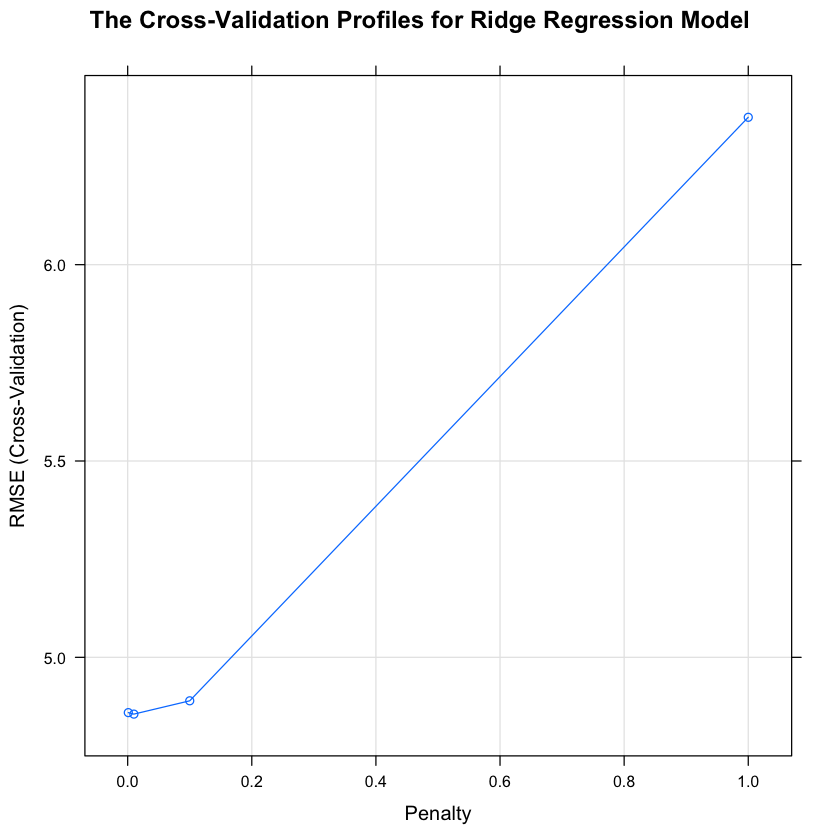

In [61]:
update(plot(ridge_model), xlab = "Penalty",
       main = "The Cross-Validation Profiles for Ridge Regression Model")

## Lasso

In [294]:
### lasso
# need prprocess to data
lasso_grid <- expand.grid(fraction = seq(.05, 1, length = 20))
set.seed(100)
lasso_model <- train(medv ~ .,
                     data = Boston,
                     method = "lasso",
                     preProcess = c("center", "scale"),
                     tuneGrid = lasso_grid,
                     trControl = trainControl(method= "cv"))
lasso_model
# lasso_pred <- predict(lasso_model, testset)
# postResample(pred = lasso_pred,  obs = testset$medv)

The lasso 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 455, 456, 456, 455, 455, 455, ... 
Resampling results across tuning parameters:

  fraction  RMSE      Rsquared   RMSE SD    Rsquared SD
  0.05      8.348352  0.5735492  1.1327604  0.07246578 
  0.10      7.629564  0.6250124  1.0983416  0.07372327 
  0.15      6.970302  0.6394830  1.0497601  0.08124005 
  0.20      6.405943  0.6482776  0.9935616  0.08960572 
  0.25      5.932718  0.6696209  0.9265538  0.09270024 
  0.30      5.556784  0.6797869  0.8676191  0.09300290 
  0.35      5.324148  0.6861087  0.8104286  0.09459130 
  0.40      5.193702  0.6933912  0.7617466  0.09363027 
  0.45      5.131131  0.6998355  0.7240742  0.09146567 
  0.50      5.062285  0.7070568  0.7068524  0.08844347 
  0.55      5.009256  0.7122770  0.6896894  0.08574952 
  0.60      4.966524  0.7165712  0.6706342  0.08279629 
  0.65      4.933525  0.7202272  0.6593808  

In [295]:
x <- as.matrix(Boston[,-14])
y <- as.double(as.matrix(Boston[, 14]))

# Fitting the model (Ridge: Alpha = 0)
set.seed(999)
cv.lasso <- cv.glmnet(x, y, alpha=1,lambda=seq(.05, 1, length = 20), parallel=TRUE, standardize=TRUE, type.measure='auc')

cv.lasso$lambda.min
coef(cv.lasso, s=cv.lasso$lambda.min)
# min.lambda.index <- which(cv.ridge$lambda == cv.ridge$lambda.min)
# min.lambda.index
# cv.ridge$glmnet.fit$beta[, min.lambda.index]
# min.lambda.betas <- predict(cv.ridge, s = "lambda.min")
# min.lambda.betas

Warning message:
In cv.elnet(list(structure(list(a0 = structure(c(15.2891980540603, : Only 'mse', 'deviance' or 'mae'  available for Gaussian models; 'mse' used

[1] 0.1

14 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  2.961074e+01
crim        -7.329817e-02
zn           3.031749e-02
indus       -1.149451e-04
chas         2.593420e+00
nox         -1.358091e+01
rm           4.028610e+00
age          .           
dis         -1.150184e+00
rad          1.360345e-01
tax         -4.967890e-03
ptratio     -8.884476e-01
black        8.353034e-03
lstat       -5.223466e-01

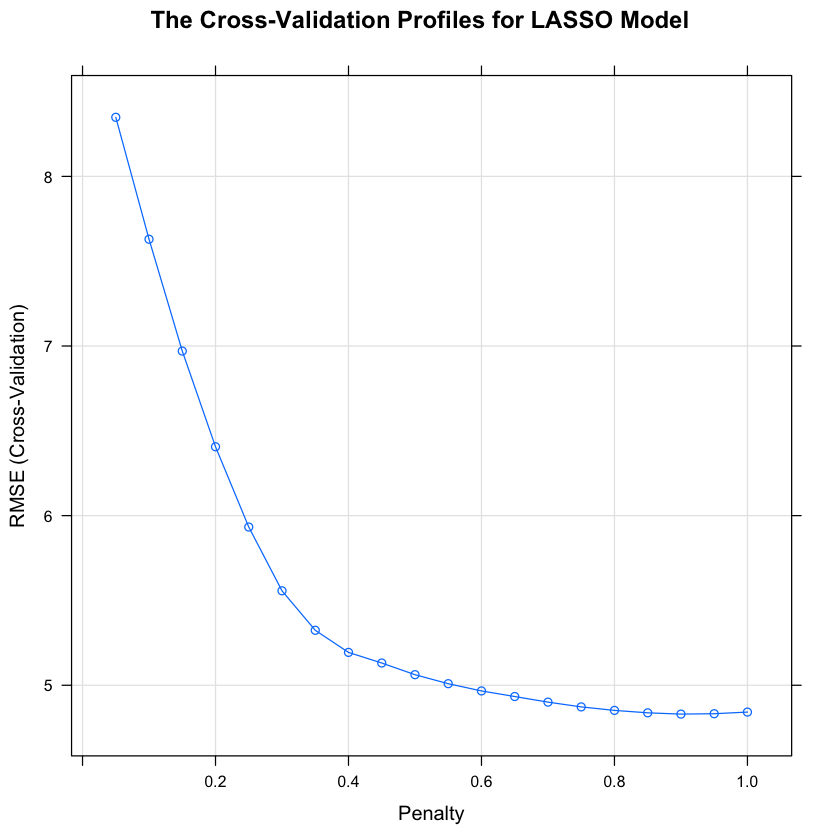

In [297]:
update(plot(lasso_model), xlab = "Penalty",
       main = "The Cross-Validation Profiles for LASSO Model")